<a href="https://colab.research.google.com/github/DemianDeveloper/Machine_Learning/blob/main/XRP_logistical_regression_price_predictable_FGI%2BRSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#прогноз движения XRP на основе индексов FGI(индекс страха и жадности) и RSI
#API индекса FGI берём от сюда: https://alternative.me/crypto/fear-and-greed-index/

In [3]:
import requests

In [2]:
N = 1300

In [4]:
# создаём функцию запроса
def parse_fgi(N):
  url = 'https://api.alternative.me/fng/?format=csv&date_format=us'
  parameters = {
      'limit': N,
      'format': 'json'
  }

  response = requests.get(url, params=parameters)
  data = response.json()['data']
  fgi_values = [float(i['value']) for i in data][::-1]

  return fgi_values

fgi_values = parse_fgi(N)

In [5]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

ok
checking for objdir... .libs
checking for ar... ar
checking for ranlib... ranlib
checking for strip... strip
checking if gcc supports -fno-rtti -fno-exceptions... no
checking for gcc option to produce PIC... -fPIC
checking if gcc PIC flag -fPIC works... yes
checking if gcc static flag -static works... yes
checking if gcc supports -c -o file.o... yes
checking whether the gcc linker (/usr/bin/ld -m elf_x86_64) supports shared libraries... yes
checking whether -lc should be explicitly linked in... no
checking dynamic linker characteristics... GNU/Linux ld.so
checking how to hardcode library paths into programs... immediate
checking whether stripping libraries is possible... yes
checking if libtool supports shared libraries... yes
checking whether to build shared libraries... yes
checking whether to build static libraries... yes
configure: creating libtool
appending configuration tag "CXX" to libtool
checking for ld used by g++... /usr/bin/ld -m elf_x86_64
checking if the linker (/usr/b

In [6]:
from datetime import datetime, timedelta
import pandas as pd
import talib
import numpy as np
from talib import abstract
import yfinance as yf


In [7]:
def parse_dates(N):
  end_date = datetime.today()
  start_date = end_date - timedelta(days=N)
  dates = pd.date_range(start=start_date, end=end_date)
  us_dates = dates.strftime('%Y-%m-%d').tolist()

  return us_dates



In [8]:
def parse_prices(coin, N):
    period = parse_dates(N)
    end_time = period[-1]
    start_time = period[0]
    data = yf.download(coin+'-USD', start_time, end_time)
    data.rename(columns = {'Open': 'open',
                         'High': 'high',
                         'Close': 'close',
                         'Volume': 'volume'}, inplace =True)
    return data

# Получаем исторические данные о ценах для XRP
data_prices = parse_prices('XRP', N)
print(data_prices)


[*********************100%%**********************]  1 of 1 completed

                open      high       Low     close  Adj Close      volume
Date                                                                     
2020-09-09  0.236723  0.243213  0.234273  0.239609   0.239609  1203137131
2020-09-10  0.239689  0.249185  0.239570  0.243530   0.243530  1353359148
2020-09-11  0.243530  0.244815  0.237520  0.243292   0.243292  1096662166
2020-09-12  0.243055  0.248752  0.241820  0.247814   0.247814  1043746083
2020-09-13  0.247814  0.253136  0.238857  0.241801   0.241801  1163182194
...              ...       ...       ...       ...        ...         ...
2024-03-27  0.632253  0.634468  0.608322  0.611964   0.611964  1989187555
2024-03-28  0.611949  0.636447  0.604837  0.624554   0.624554  1783253508
2024-03-29  0.624570  0.643995  0.610470  0.630750   0.630750  1874392966
2024-03-30  0.630753  0.636456  0.618905  0.621836   0.621836  1042947263
2024-03-31  0.621836  0.629763  0.621214  0.629225   0.629225   756039151

[1300 rows x 6 columns]


In [9]:
def indicators(df, N):
  df['rsi'] = abstract.RSI(df)
  df['sma'] = abstract.SMA(df)
  df['fgi'] = parse_fgi(N)
  return df

df = indicators(data_prices, N)
df

,open,high,Low,close,Adj Close,volume,rsi,sma,fgi
Date,,,,,,,,,
2020-09-09,0.236723,0.243213,0.234273,0.239609,0.239609,1203137131,NaN,NaN,38.0
2020-09-10,0.239689,0.249185,0.239570,0.243530,0.243530,1353359148,NaN,NaN,41.0
2020-09-11,0.243530,0.244815,0.237520,0.243292,0.243292,1096662166,NaN,NaN,41.0
2020-09-12,0.243055,0.248752,0.241820,0.247814,0.247814,1043746083,NaN,NaN,38.0
2020-09-13,0.247814,0.253136,0.238857,0.241801,0.241801,1163182194,NaN,NaN,39.0
...,...,...,...,...,...,...,...,...,...
2024-03-27,0.632253,0.634468,0.608322,0.611964,0.611964,1989187555,48.708738,0.627104,80.0
2024-03-28,0.611949,0.636447,0.604837,0.624554,0.624554,1783253508,50.887402,0.628380,79.0
2024-03-29,0.624570,0.643995,0.610470,0.630750,0.630750,1874392966,51.968695,0.630211,75.0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

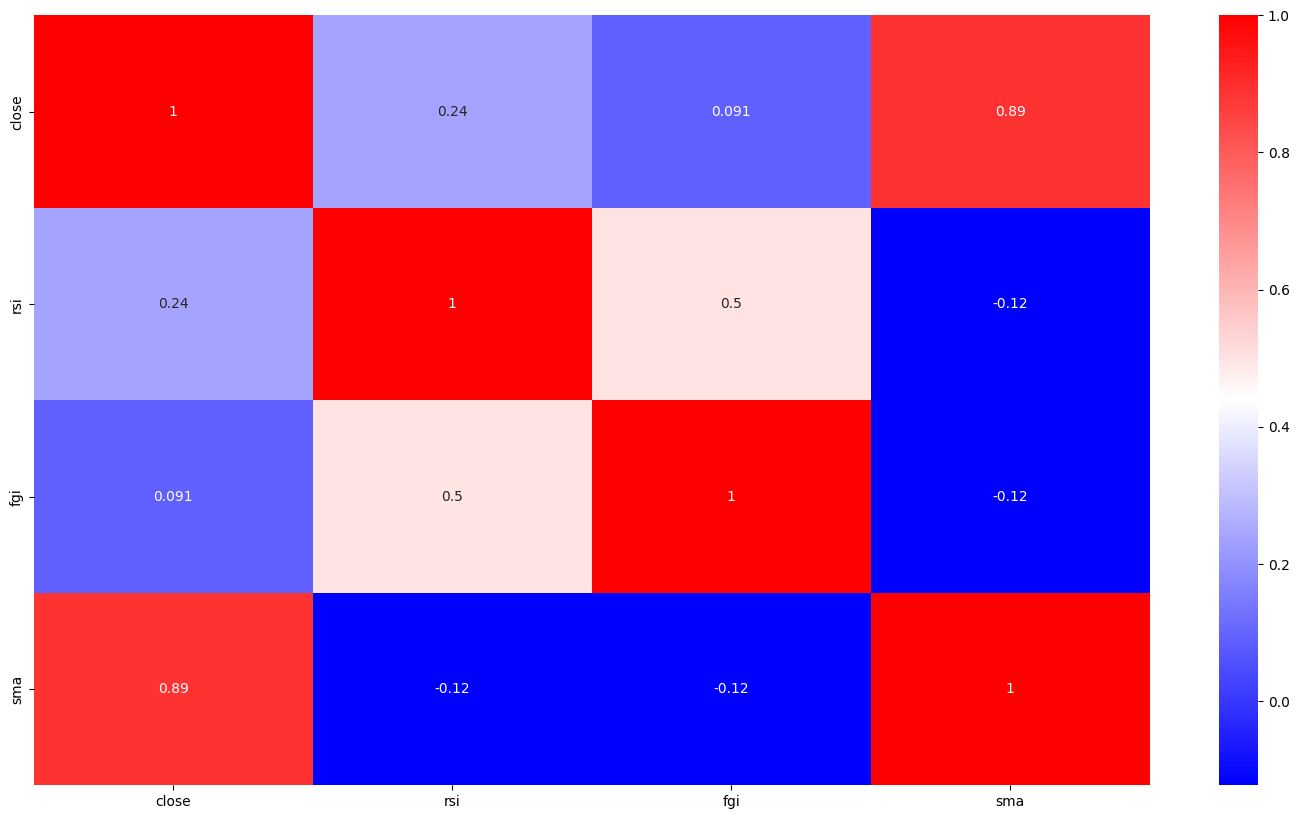

In [11]:
def corr_matrix(df):
  df = df[['close', 'rsi', 'fgi', 'sma']]
  corr_df = df.corr(method='pearson')
  plt.figure(figsize = (18, 10))
  sns.heatmap(corr_df, cmap = 'bwr', annot=True)
  plt.show()

corr_matrix(df)

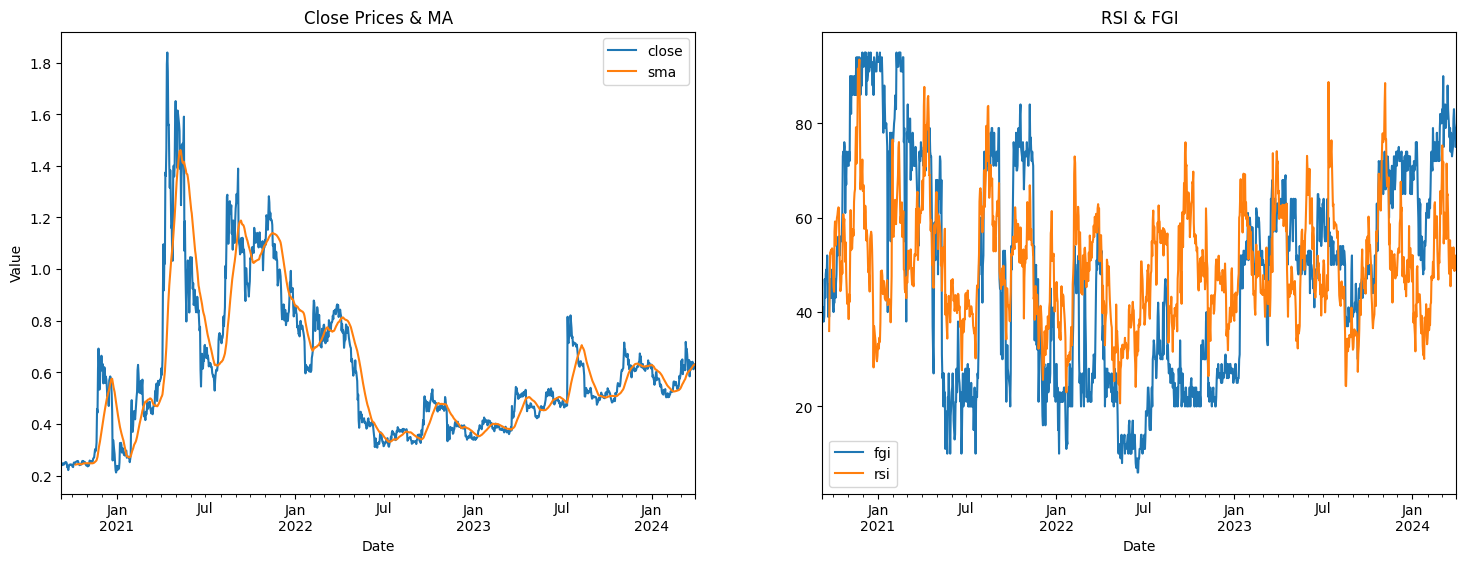

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
df[['close', 'sma']].plot(ax=axes[0], title='Close Prices & MA', xlabel='Date', ylabel='Value')
df[['fgi', 'rsi']].plot(ax=axes[1], title='RSI & FGI', xlabel='Date')
plt.show()

In [13]:
y = np.where(df['close'].shift(-1) > df['close'], 1, 0)
df['y'] = y
df['p'] = df['close']
df[['p', 'y']]

,p,y
Date,,
2020-09-09,0.239609,1
2020-09-10,0.243530,0
2020-09-11,0.243292,1
2020-09-12,0.247814,0
2020-09-13,0.241801,1
...,...,...
2024-03-27,0.611964,1
2024-03-28,0.624554,1
2024-03-29,0.630750,0


In [14]:
def preprocessing(df):
  df.dropna(inplace=True)
  x = df[['rsi', 'fgi', 'sma']]
  y = df[['y']]
  p = df[['p']]

  return x, y, p

x, y, p = preprocessing(df)
x, y

(                  rsi   fgi       sma
 Date                                 
 2020-10-08  58.551263  48.0  0.242597
 2020-10-09  59.989290  53.0  0.243060
 2020-10-10  60.567187  55.0  0.243418
 2020-10-11  61.634478  52.0  0.243833
 2020-10-12  62.195088  56.0  0.244120
 ...               ...   ...       ...
 2024-03-27  48.708738  80.0  0.627104
 2024-03-28  50.887402  79.0  0.628380
 2024-03-29  51.968695  75.0  0.630211
 2024-03-30  50.254464  75.0  0.631395
 2024-03-31  51.677372  79.0  0.632306
 
 [1271 rows x 3 columns],
             y
 Date         
 2020-10-08  1
 2020-10-09  1
 2020-10-10  1
 2020-10-11  1
 2020-10-12  0
 ...        ..
 2024-03-27  1
 2024-03-28  1
 2024-03-29  0
 2024-03-30  1
 2024-03-31  0
 
 [1271 rows x 1 columns])

In [15]:
percent_for_train = 0.7
split = int(percent_for_train * len(x))

X_train = x[:split]
Y_train = y[:split]
p_train = p[:split]

X_test = x[:split]
Y_test = y[:split]
p_test = p[:split]
[X_test, Y_test]

[                  rsi   fgi       sma
 Date                                 
 2020-10-08  58.551263  48.0  0.242597
 2020-10-09  59.989290  53.0  0.243060
 2020-10-10  60.567187  55.0  0.243418
 2020-10-11  61.634478  52.0  0.243833
 2020-10-12  62.195088  56.0  0.244120
 ...               ...   ...       ...
 2023-03-11  41.701656  33.0  0.381824
 2023-03-12  45.936783  49.0  0.381513
 2023-03-13  46.240267  56.0  0.381172
 2023-03-14  46.580437  50.0  0.381139
 2023-03-15  39.154476  52.0  0.380768
 
 [889 rows x 3 columns],
             y
 Date         
 2020-10-08  1
 2020-10-09  1
 2020-10-10  1
 2020-10-11  1
 2020-10-12  0
 ...        ..
 2023-03-11  1
 2023-03-12  1
 2023-03-13  1
 2023-03-14  0
 2023-03-15  1
 
 [889 rows x 1 columns]]

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [17]:
model = LogisticRegression()

In [18]:
def ML(clf, X_train, X_test, Y_train, Y_test):
  clf.fit(X_train, Y_train)
  preds = clf.predict(X_test)
  acc_score = accuracy_score(Y_test, preds)
  return preds, acc_score

preds, accuracy_score = ML(model, X_train, X_test, Y_train, Y_test)
accuracy_score

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5230596175478065

1 - цена пойдёт вверх
0 - цена пойдёт вниз

однако далее в коде преобразуем логику в следующую и теперь такая логика:
0 - удержание позиции
1 - покупаем
-1 - продаём

In [24]:
signals =[]
for pred in preds:
  if pred == 0:
    signals.append(-1)
  else:
    signals.append(1)

position = 0
decisions = []
for signal in signals:
  if signal == -1:
    if position == -1:
      decisions.append(0)
    else:
      decisions.append(signal)
      position = signal

  else:
    if position == 1:
      decision = signal
    else:
      decisions.append(signal)
      position = signal

count = decisions.count(1)
count

32

In [26]:
prices = p_test['p'].tolist()

# Проверяем длины списков
print("Длина списка решений:", len(decisions))
print("Длина списка цен:", len(prices))
print("Длина списка прогнозов:", len(preds))
print("Длина списка сигналов:", len(signals))

# Создаем DataFrame только если длины всех списков одинаковы
if len(decisions) == len(prices) == len(preds) == len(signals):
    back_test_df = pd.DataFrame({'decision': decisions, 'price': prices, 'signal': preds, 'signals0': signals}, index=x_test.index)
    dates = x_test.index.tolist()
    back_test_df['date'] = dates
    back_test_df.set_index('date', inplace=True)
    print("DataFrame успешно создан.")
else:
    print("Длины списков не совпадают, невозможно создать DataFrame.")


Длина списка решений: 417
Длина списка цен: 889
Длина списка прогнозов: 889
Длина списка сигналов: 889
Длины списков не совпадают, невозможно создать DataFrame.


In [29]:
prices = p_test['p'].tolist()

# Используем только первые 417 элементов из списков с длинной 889
prices = prices[:417]
preds = preds[:417]
signals = signals[:417]

# Создаем DataFrame
back_test_df = pd.DataFrame({'decision': decisions[:417], 'price': prices, 'signal': preds[:417], 'signals0': signals[:417]}, index=X_test.index[:417])
back_test_df['date'] = back_test_df.index
back_test_df.set_index('date', inplace=True)


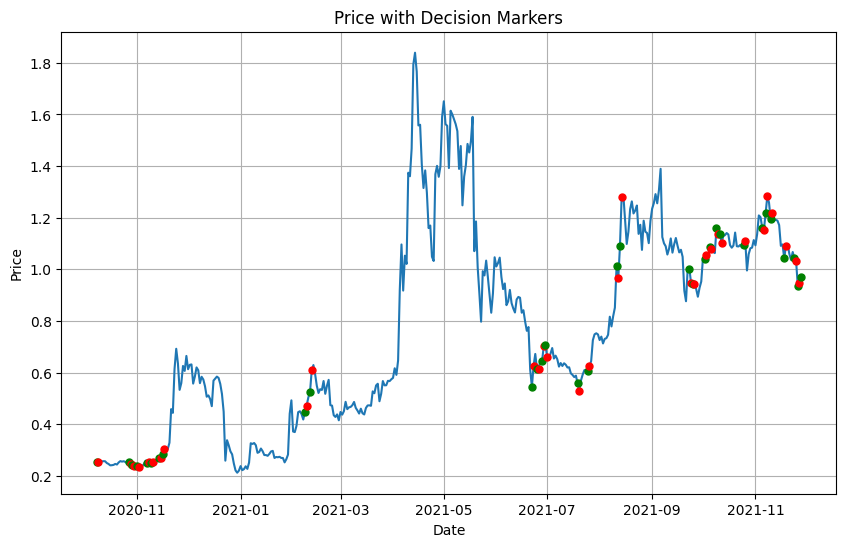

In [32]:
# Переименовываем индекс в столбец 'date'
back_test_df.reset_index(inplace=True)
back_test_df.rename(columns={'index': 'date'}, inplace=True)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(back_test_df['date'], back_test_df['price'], linestyle='-')

for index, row in back_test_df.iterrows():
    if row['decision'] == -1:
        plt.plot(row['date'], row['price'], marker='o', color='red', markersize=5)
    elif row['decision'] == 1:
        plt.plot(row['date'], row['price'], marker='o', color='green', markersize=5)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price with Decision Markers')
plt.grid(True)

plt.show()
